In [56]:
import warnings

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error


from google.colab import drive
from google.colab import files


uploaded = files.upload()
warnings.simplefilter(action="ignore", category=FutureWarning)

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET (1).csv


In [68]:
fc= pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))
fc.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [69]:
fc[ "FullDate" ] = pd.to_datetime(fc[ "FullDate" ]) 
fc.set_index( "FullDate" , inplace= True ) 
fc.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [61]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [59]:
fc.shape

(92016, 5)

In [62]:
fc.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [63]:
# Resampling hourly, daily, monthly, weekly

# hourly
fc_hourly = forecast.resample('H').mean()

# daily
fc_daily = forecast.resample('D').mean()

# weekly
fc_weekly = forecast.resample('W').mean()


# monthly
fc_monthly = forecast.resample('M').mean()


print(fc_hourly .shape)
print(fc_daily.shape)
print(fc_weekly.shape)
print(fc_monthly.shape)

(92016, 4)
(3834, 4)
(548, 4)
(126, 4)


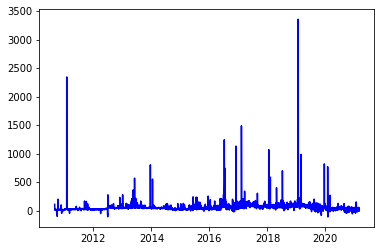

In [153]:
# Plotting the daily sampled data
daily_pic = (fc_daily['ElecPrice'])
plt.plot(daily_pic , 'blue');

In [70]:
# Resampling the data again daily and summing it
daily_fc = fc.resample('D')
new_fc = daily_fc.sum()
new_fc = new_fc.reset_index() 
new_fc.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [157]:
adf_result = adfuller(new_fc[ 'SysLoad'])

print(f'p-value: {adf_result[ 1 ]}') 

p-value: 0.004253725504574117


In [158]:
adf_result = adfuller(new_fc[ 'GasPrice'])

print(f'p-value: {adf_result[ 1 ]}') 

p-value: 0.04502721288462542


In [159]:
adf_result = adfuller(new_fc[ 'GasPrice'])

print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [160]:
adf_result = adfuller(new_fc[ 'ElecPrice'])

print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [126]:
# Selecting ElecPrice column for univariate time series modelling
new_data = new_fc[['FullDate','ElecPrice']]
new_data =new_data.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
new_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [127]:
# Splitting the dataset into train and test sets respectively
fc_train = new_data.iloc[0:2757]
fc_test  = new_data.iloc[2757:]

In [86]:
fc_train.shape, fc_test.shape

((2757, 2), (1077, 2))

In [ ]:
!pip install prophet

In [77]:
from prophet import Prophet

In [87]:
#fit to model
model = Prophet(daily_seasonality=True)
model.fit(fc_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdlbs7jc/gu_wlkgc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdlbs7jc/i8gb7d4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24713', 'data', 'file=/tmp/tmpvdlbs7jc/gu_wlkgc.json', 'init=/tmp/tmpvdlbs7jc/i8gb7d4z.json', 'output', 'file=/tmp/tmp4hhqw51u/prophet_model-20221004224644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:46:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:46:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [131]:
# Predicting the values of the test set 
forecast = model.predict(fc_test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,4210.287161,95.819207,4895.134433,4210.287161,4210.287161,-1674.972252,-1674.972252,-1674.972252,-1519.218463,...,9.746355,9.746355,9.746355,-165.500145,-165.500145,-165.500145,0.0,0.0,0.0,2535.314909
1,2018-03-21,4211.100590,356.558029,5031.103933,4211.100590,4211.100590,-1522.383711,-1522.383711,-1522.383711,-1519.218463,...,159.375608,159.375608,159.375608,-162.540856,-162.540856,-162.540856,0.0,0.0,0.0,2688.716879
2,2018-03-22,4211.914019,138.572811,5085.030061,4211.914019,4211.914019,-1424.095695,-1424.095695,-1424.095695,-1519.218463,...,257.140553,257.140553,257.140553,-162.017786,-162.017786,-162.017786,0.0,0.0,0.0,2787.818324
3,2018-03-23,4212.727448,75.521144,4937.112653,4212.727448,4212.727448,-1632.705017,-1632.705017,-1632.705017,-1519.218463,...,50.279187,50.279187,50.279187,-163.765742,-163.765742,-163.765742,0.0,0.0,0.0,2580.022431
4,2018-03-24,4213.540878,-179.635957,4552.975230,4213.540878,4213.540878,-1958.239415,-1958.239415,-1958.239415,-1519.218463,...,-271.477866,-271.477866,-271.477866,-167.543086,-167.543086,-167.543086,0.0,0.0,0.0,2255.301463


In [132]:
# Calculating the RMSE by comparing the real values and the forecasted values
mse_prophet = mean_squared_error(fc_test.y,forecast.yhat)
print (f"The RMSE for prophet is {np.sqrt(mse_prophet):.2f}")

The RMSE for prophet is 3216.90


In [133]:
# Calculating the MAPE
true = fc_test['y']
pred = forecast['yhat']

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

MAPE(true, pred)

548.8183875636939

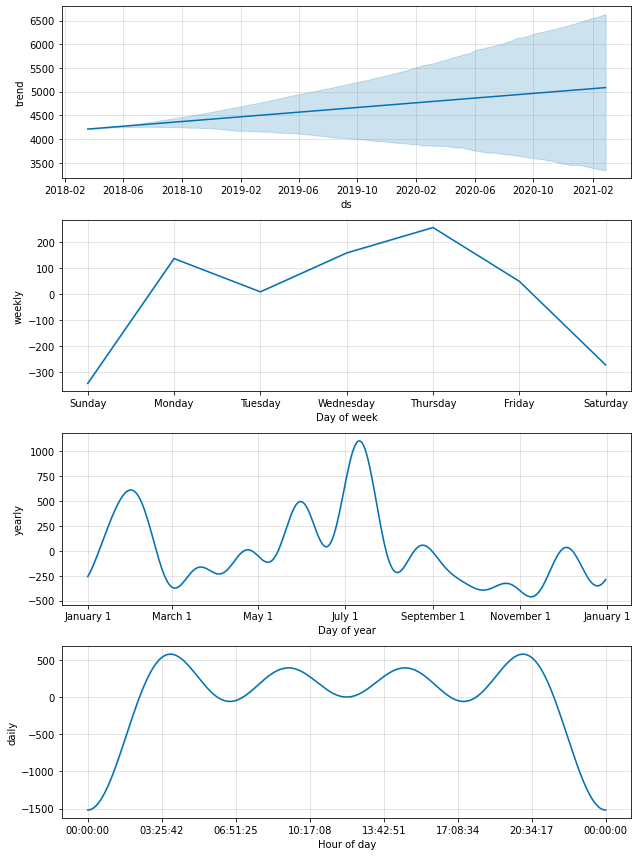

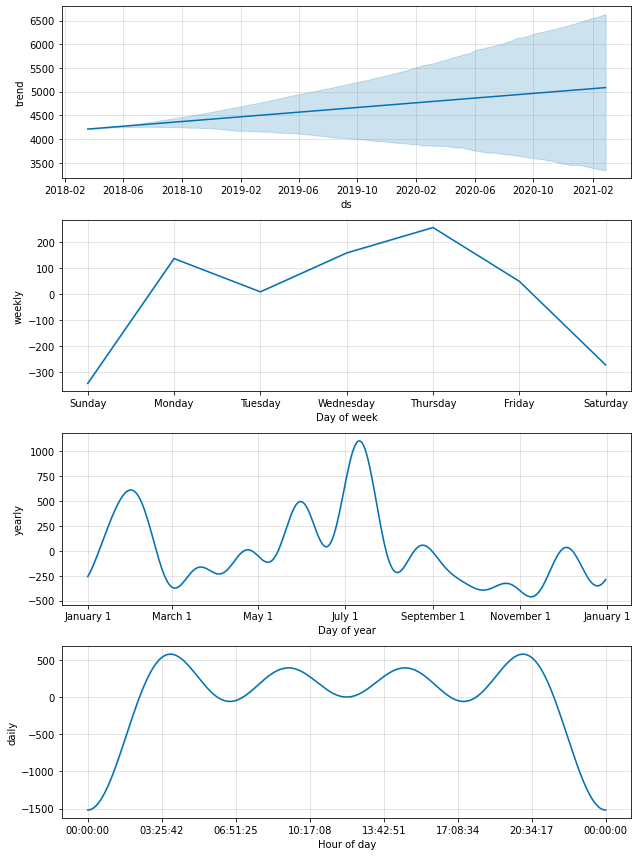

In [134]:
# Plotting forecast components
model.plot_components(forecast)

In [139]:
# using the univariate data
new_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [140]:
new_data["add1"] = new_fc['SysLoad']
new_data["add2"] = new_fc['Tmax']
new_data["add3"] = new_fc['GasPrice']

In [142]:
new_data.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [145]:
# Splitting the dataset into train and test sets respectively 
fc_train = new_data.iloc[0:2757]
fc_test  = new_data.iloc[2757:]

In [146]:
ml = Prophet()

# Adding the other independent variables as regressors
ml.add_regressor('add1')
ml.add_regressor('add2')
ml.add_regressor('add3')

ml.fit(fc_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdlbs7jc/un96j41e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdlbs7jc/dfomo94p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8883', 'data', 'file=/tmp/tmpvdlbs7jc/un96j41e.json', 'init=/tmp/tmpvdlbs7jc/dfomo94p.json', 'output', 'file=/tmp/tmpmi0wp4be/prophet_model-20221005001237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [147]:
# Predicting the test set
forecast1 = ml.predict(fc_test)
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1867.223392,-188.082861,4540.091474,1867.223392,1867.223392,-855.339847,-855.339847,-855.339847,0.231341,...,-84.386938,-84.386938,-84.386938,-38.956286,-38.956286,-38.956286,0.0,0.0,0.0,1988.494818
1,2018-03-21,1867.913438,-100.780382,4053.928179,1867.913438,1867.913438,-1025.146787,-1025.146787,-1025.146787,0.228596,...,42.575537,42.575537,42.575537,-29.666461,-29.666461,-29.666461,0.0,0.0,0.0,1980.063539
2,2018-03-22,1868.603483,680.250923,5058.552971,1868.603483,1868.603483,-214.698331,-214.698331,-214.698331,0.215297,...,145.720761,145.720761,145.720761,-24.631249,-24.631249,-24.631249,0.0,0.0,0.0,2899.369177
3,2018-03-23,1869.293529,506.251897,4840.032595,1869.293529,1869.293529,-274.563958,-274.563958,-274.563958,0.207486,...,-44.215845,-44.215845,-44.215845,-23.709562,-23.709562,-23.709562,0.0,0.0,0.0,2583.628888
4,2018-03-24,1869.983574,-672.924670,3805.731996,1869.983574,1869.983574,-1075.131344,-1075.131344,-1075.131344,0.205586,...,-117.684505,-117.684505,-117.684505,-26.650931,-26.650931,-26.650931,0.0,0.0,0.0,1437.347502


In [148]:
# Calculating the RMSE by comparing the real values and the forecasted values
mse_prophet = mean_squared_error(fc_test.y,forecast1.yhat)
print (f"The RMSE for prophet is {np.sqrt(mse_prophet):.2f}")

The RMSE for prophet is 2708.17


In [149]:
# Calculating the MAPE
true = fc_test['y']
pred = forecast1['yhat']

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

MAPE(true, pred)

232.4348680868166

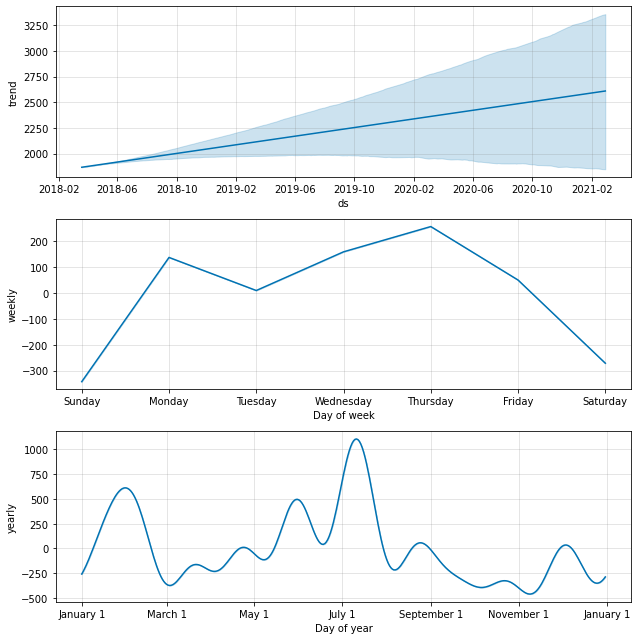

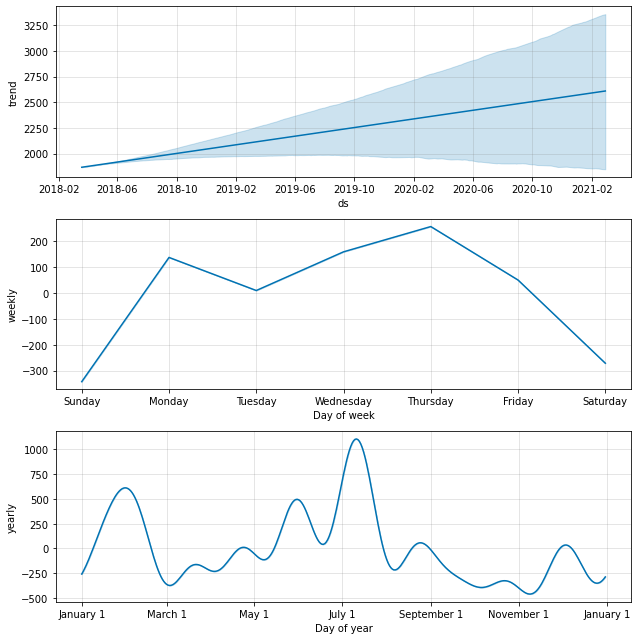

In [113]:
# Plotting the multivariate forecast components
model.plot_components(forecast1)